In [93]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cdist 

In [270]:

X, _ = make_blobs(n_samples=1000,
                  centers=2,
                  n_features=2,
                  )

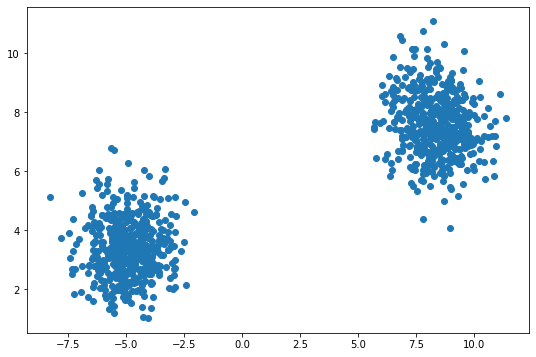

In [273]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])

In [529]:
import warnings
warnings.filterwarnings("ignore", "Mean of empty slice")

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2)) 

class KMeans:
    
    def __init__(self, k, max_iter=1000):
        self.k = k
        self.max_iter = max_iter
        
    def fit_predict(self, x):
        # randomly initialize centroids in shape (k, x.shape[1])
        
        self.centroids = x[np.random.choice(x.shape[0], self.k , replace=True), :]
        prev_centroids = self.centroids
        
        for _ in range(self.max_iter):
            # calculate distances for each point to each centroid
            dists = np.zeros((x.shape[0], prev_centroids.shape[0])) # zero matrix
            for i,point in enumerate(x):
                for j,centr in enumerate(prev_centroids):
                    dists[i][j] = euclidean_distance(point, centr)  
            
               
            # find closest centroid to each point
            labels = np.argmin(dists, axis=1) # indexes 
            
            # for each centroid recalculate centroid coordinates as mean of its cluster
            new_centroids = np.array([x[labels == k].mean(axis=0) for k in range(self.k)]) 
            
              
            # if prev centroids are same as new centroids: done
            if np.allclose(prev_centroids, new_centroids):
                break
                
            # find dists for new centroids
            dists = np.zeros((x.shape[0], prev_centroids.shape[0])) 
            for i, point in enumerate(x):
                for j,centr in enumerate(new_centroids):
                    dists[i][j] = euclidean_distance(point, centr) 
            
            labels = np.argmin(dists, axis=1)
            return labels

In [530]:
# Проведите поиск гиперпараметра с помощью Silluhete score

In [531]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [535]:
model = KMeans(3)

model.fit_predict(X)

array([1, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 2, 0, 0, 0, 1, 2, 0, 0,
       0, 1, 1, 2, 1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 1, 0, 0, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 1, 0, 0,
       2, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 0, 0, 0, 0, 1,
       2, 0, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 0,
       1, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0,
       2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 0, 0,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0,
       2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 2, 1, 0,
       0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 2, 1,

In [536]:
def compute_silhouette_score(n_clusters):
    for n in range(2, n_clusters):
        model = KMeans(k=n)
        prediction = model.fit_predict(X)
        s_score = silhouette_score(X, prediction,  metric='euclidean')
        print("Silhouette score is {} for {} clusters".format(s_score, n))

In [543]:
compute_silhouette_score(11)

Silhouette score is 0.8696175045831098 for 2 clusters
Silhouette score is 0.5705356000590559 for 3 clusters
Silhouette score is 0.5846657724530939 for 4 clusters
Silhouette score is 0.3053919145634908 for 5 clusters
Silhouette score is 0.30905306748894956 for 6 clusters
Silhouette score is 0.5633466522110884 for 7 clusters
Silhouette score is 0.25712188700133354 for 8 clusters
Silhouette score is 0.2851495406813895 for 9 clusters
Silhouette score is 0.27298260415278514 for 10 clusters


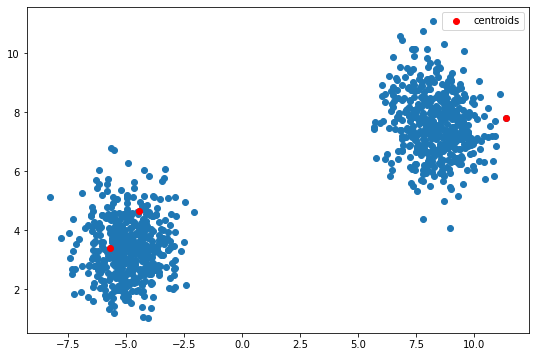

In [542]:
plt.figure(figsize=(9,6))
scatter = plt.scatter(X[:,0], X[:,1])
plt.scatter(model.centroids[:,0], model.centroids[:,1], c='red', label='centroids')
plt.legend();